In [1]:
from preprocessing import *

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A Stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Reginol Node Positive   4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

# DT Model
model is a decision tree classifier 

We try different hyperparameter values to optimize our model

## import DT model

In [3]:
from sklearn.tree import DecisionTreeClassifier #import our model
from sklearn.metrics import accuracy_score  #import metrics library to measure accuracy

### choose Best Max_depth

In [4]:
#define a list to use its value as depth from 1 to 20
max_depth_values = list(range(1, 21))
#define a list to store accuracy for training values
accuracy_for_train_values = []
#define a list to store accuracy for validation values
accuracy_for_validation_values = []

for max_depth in max_depth_values: #loop on all max depth values
    #get object from model and set max_depth every loop with one value from list 1:20
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    #fitting model --training process--
    model.fit(X_train_balanced, y_train_balanced)
    #predict output on training data --test process--
    y_predict_train = model.predict(X_train_balanced)
    #predict output on validation data
    y_predidect_validation = model.predict(X_val)
    #get accuracy for training data
    accuracy_train = accuracy_score(y_train_balanced, y_predict_train)
    #get accuracy for validation data
    accuracy_validation = accuracy_score(y_val, y_predidect_validation)
    accuracy_for_train_values.append(accuracy_train)
    accuracy_for_validation_values.append(accuracy_validation)
    
results = pd.DataFrame({
    'max_depth': max_depth_values,
    'acc_train': accuracy_for_train_values,
    'acc_val': accuracy_for_validation_values,
})

results

,max_depth,acc_train,acc_val
0,1,0.764563,0.871006
1,2,0.764563,0.871006
2,3,0.797735,0.854438
3,4,0.807443,0.811834
4,5,0.830097,0.728994
5,6,0.853560,0.788166
6,7,0.872977,0.760947
7,8,0.902913,0.743195
8,9,0.928803,0.744379
9,10,0.953074,0.742012


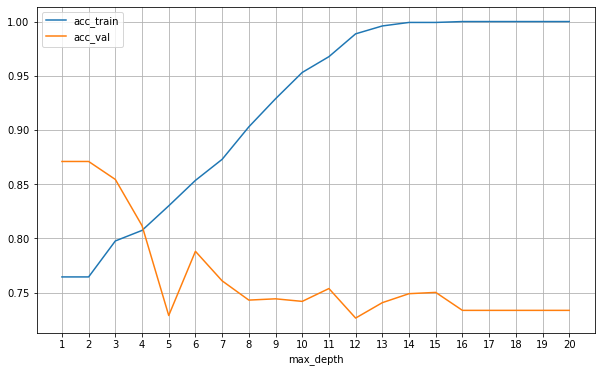

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results.plot(x='max_depth', y=['acc_train', 'acc_val'], figsize=(10, 6))
plt.xticks(np.arange(1, 21))
plt.grid(axis='both')
plt.show()

Best max_depth is `4`

### choose Best criterion gini or entropy

In [6]:
#define a list to use its value as criterion 
criterion_values = ['gini', 'entropy']
#define a list to store accuracy for training values
accuracy_for_train_values = []
#define a list to store accuracy for validation values
accuracy_for_validation_values = []

for criterion in criterion_values: #loop on all criterion values
    #get object from model and set max_depth to 3 and criterion every loop with one value from list criterion_values
    model = DecisionTreeClassifier(max_depth=4,criterion=criterion, random_state=0)
    #fitting model --training process--
    model.fit(X_train_balanced, y_train_balanced)
    #predict output on training data --test process--
    y_predict_train = model.predict(X_train_balanced)
    #predict output on validation data
    y_predidect_validation = model.predict(X_val)
    #get accuracy for training data
    accuracy_train = accuracy_score(y_train_balanced, y_predict_train)
    #get accuracy for validation data
    accuracy_validation = accuracy_score(y_val, y_predidect_validation)
    accuracy_for_train_values.append(accuracy_train)
    accuracy_for_validation_values.append(accuracy_validation)
    
results = pd.DataFrame({
    'criterion_values': criterion_values,
    'acc_train': accuracy_for_train_values,
    'acc_val': accuracy_for_validation_values,
})
results

,criterion_values,acc_train,acc_val
0,gini,0.807443,0.811834
1,entropy,0.794498,0.856805


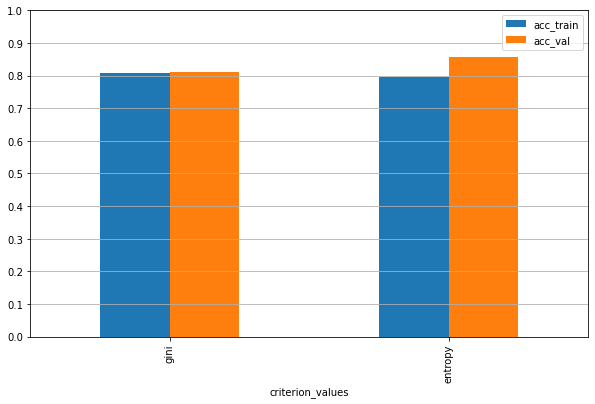

In [7]:
results.plot.bar(x='criterion_values', y=['acc_train', 'acc_val'], figsize=(10, 6))
plt.grid(axis='y')
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.show()

Best Criterion value is `gini`

### choose Best splitter best or random

In [8]:
#define a list to use its value as splitter 
splitter_values = ['best', 'random']
#define a list to store accuracy for training values
accuracy_for_train_values = []
#define a list to store accuracy for validation values
accuracy_for_validation_values = []

for splitter in splitter_values: #loop on all splitter values
    #get object from model and set max_depth to 3 and criterion to gini and
    ##splitter every loop with one value from list splitter_values
    model = DecisionTreeClassifier(max_depth=4,criterion='gini', splitter=splitter, random_state=0)
    #fitting model --training process--
    model.fit(X_train_balanced, y_train_balanced)
    #predict output on training data --test process--
    y_predict_train = model.predict(X_train_balanced)
    #predict output on validation data
    y_predidect_validation = model.predict(X_val)
    #get accuracy for training data
    accuracy_train = accuracy_score(y_train_balanced, y_predict_train)
    #get accuracy for validation data
    accuracy_validation = accuracy_score(y_val, y_predidect_validation)
    accuracy_for_train_values.append(accuracy_train)
    accuracy_for_validation_values.append(accuracy_validation)
    
results = pd.DataFrame({
    'splitter_values': splitter_values,
    'acc_train': accuracy_for_train_values,
    'acc_val': accuracy_for_validation_values,
})
results

,splitter_values,acc_train,acc_val
0,best,0.807443,0.811834
1,random,0.772654,0.846154


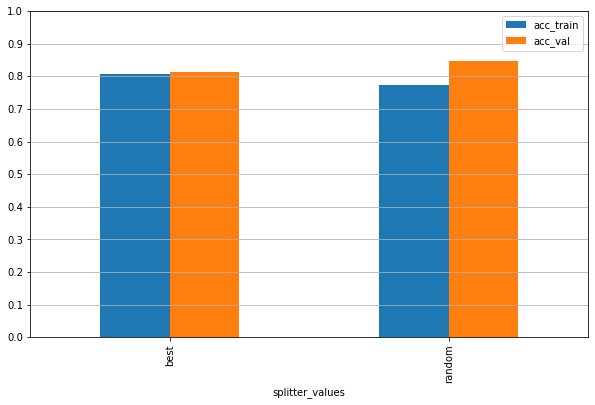

In [9]:
results.plot.bar(x='splitter_values', y=['acc_train', 'acc_val'], figsize=(10, 6))
plt.grid(axis='y')
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.show()

Best splitter value is `best`

# Best model
with :
max_depth    = `4`, 

criterion    = `gini`,
     
splitter     = `best`, 

random_state = `0`

In [10]:
best_model = DecisionTreeClassifier(max_depth=4, criterion='gini', splitter='best', random_state=0)
best_model_fit = best_model.fit(X_train_balanced, y_train_balanced)

## Test Our Best Model

In [11]:
y_pred_test = best_model.predict(X_test)
print(round(accuracy_score(y_test, y_pred_test)*100), "%")

82 %


In [12]:
from sklearn.metrics import confusion_matrix
c_mat = confusion_matrix(y_test, y_pred_test)
print(c_mat)

[[122  59]
 [157 870]]


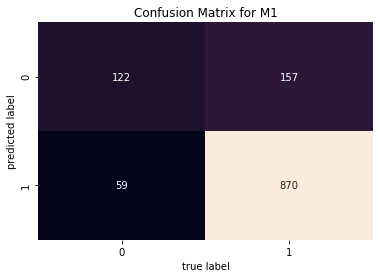

In [13]:
import seaborn as sns
sns.heatmap(c_mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for M1')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("M1_confusion_matrix.png")
plt.show()

# Analysing feature importances

Feature importances: Which features are most important in the model's decision?

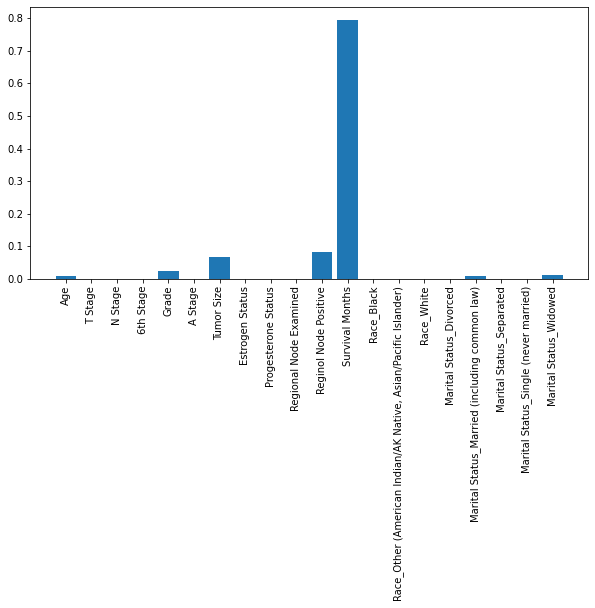

In [14]:
plt.figure(figsize=(10, 5))
plt.bar(X_train_balanced.columns, best_model.feature_importances_)
plt.xticks(rotation=90)
plt.show()

# See our Tree

In [15]:
y_classes = y_train_balanced.replace({
    0 : "alive",
    1 : "dead"
})
y_classes.unique()

array(['alive', 'dead'], dtype=object)

In [16]:
X_train_balanced.columns

Index(['Age', 'T Stage', 'N Stage', '6th Stage', 'Grade', 'A Stage',
       'Tumor Size', 'Estrogen Status', 'Progesterone Status',
       'Regional Node Examined', 'Reginol Node Positive', 'Survival Months',
       'Race_Black',
       'Race_Other (American Indian/AK Native, Asian/Pacific Islander)',
       'Race_White', 'Marital Status_Divorced',
       'Marital Status_Married (including common law)',
       'Marital Status_Separated', 'Marital Status_Single (never married)',
       'Marital Status_Widowed'],
      dtype='object')

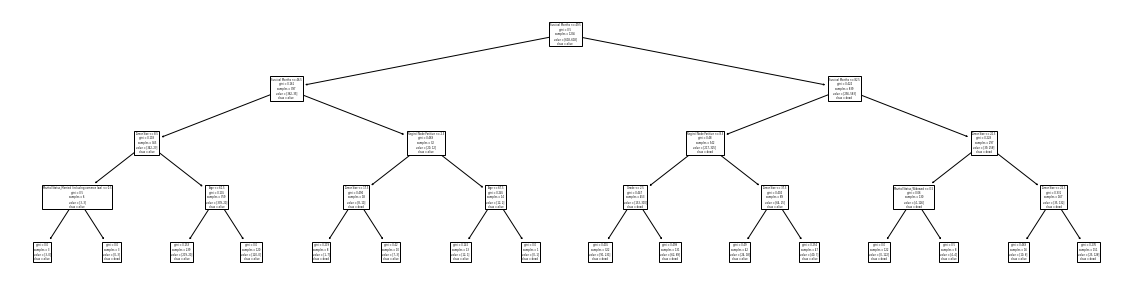

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 5))
plot_tree(best_model_fit, feature_names=X_train_balanced.columns, class_names=y_classes.unique())
plt.show()